<a href="https://colab.research.google.com/github/Veron28/bot_test/blob/master/BumpChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Строим Bump Chart </font></b>

<b><font color="black" size="+2">By Data Secrets <br>
telegram: [@DataSecrets](https://t.me/+HvSU9GXzgqRmNWY6) </font></b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Данные

In [ ]:
categories = ['A', 'B', 'C', 'D', 'E']
time_periods = [2010, 2011, 2012, 2013]

data = np.array([[1, 1, 2, 1],
                 [1, 1, 2, 5],
                 [5, 3, 2, 3],
                 [2, 4, 2, 4],
                 [4, 1, 5, 5]])

In [ ]:
# Calculate rank for each category over time
ranks = np.argsort(data, axis=0)[::-1]
rank_data = np.zeros_like(data)
for i in range(len(time_periods)):
    rank_data[:, i] = ranks[:, i] + 1

rank_data

array([[3, 4, 5, 5],
       [5, 3, 4, 2],
       [4, 5, 3, 4],
       [2, 2, 2, 3],
       [1, 1, 1, 1]])

### Bar chart

In [ ]:
df = pd.DataFrame(6-rank_data.T,
                  columns=[str(i) for i in categories])
df["Time"] = time_periods

<ipython-input-5-fa2d45b6cb35>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["",5,4,3,2,1])


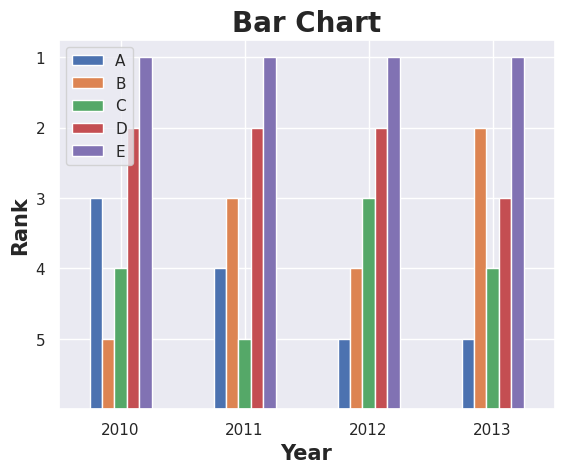

In [ ]:
fig, ax = plt.subplots()

fig=df.plot(x='Time', kind='bar', stacked=False, ax = ax);

ax.set_xlabel('Year', fontsize = 15, fontweight="bold")
ax.set_ylabel('Rank', fontsize = 15, fontweight="bold")
ax.set_title('Bar Chart', fontsize = 20, fontweight="bold")
ax.set_xticklabels(df.Time, rotation = 0)
ax.set_yticklabels(["",5,4,3,2,1])

plt.show();

### Bump chart

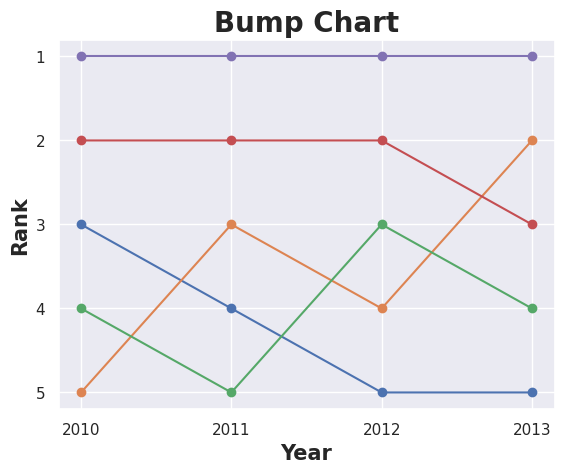

In [ ]:
# Plot bump chart
fig, ax = plt.subplots()
for i, cat in enumerate(categories):
    ax.plot(time_periods, rank_data[i], label=cat, marker = "o")

ax.invert_yaxis()
ax.set_xlabel('Year', fontsize = 15, fontweight="bold")
ax.set_ylabel('Rank', fontsize = 15, fontweight="bold")
ax.set_title('Bump Chart', fontsize = 20, fontweight="bold")

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()